<p  style="font-size:30px; text-align:center; font-weight:bold">Evaluation Results and Discussions</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 25px; font-weight:bold"><u>Load required libraries</u></p>

In [1]:
import pandas as pd # for dataframe
import matplotlib.image as mpimg # image package for image loading and processing
import matplotlib.pyplot as plt # package for plotting and visualizing patient-doctor dialogues dataset

<p style="font-size: 25px; font-weight:bold"><u>Results</u></p>

In [2]:
eval_metrics_results_dataframe = pd.read_csv('eval_metrics_results_dataframe.csv') # load the csv  
eval_metrics_results_dataframe

,model_name,loss,perplexity,accuracy,rouge-1_r,rouge-1_p,rouge-1_f,rouge-2_r,rouge-2_p,rouge-2_f,rouge-l_r,rouge-l_p,rouge-l_f
0,Encoder-Decoder LSTM,0.074382,1.052910e+00,0.990507,0.985153,0.967791,0.976377,0.975947,0.946462,0.960935,0.985153,0.967791,0.976377
1,GPT-2 Medium,10.379869,3.220473e+04,0.009531,0.497472,0.526547,0.511501,0.176954,0.186899,0.181735,0.388866,0.411154,0.399379
2,Facebook/BART-base,0.393779,1.482573e+00,0.920898,0.946877,0.954811,0.950963,0.911431,0.918899,0.915209,0.933774,0.941522,0.937755
3,T5-small,22.296913,4.824211e+09,0.004141,0.018929,0.042883,0.023984,0.000570,0.001137,0.000691,0.011724,0.026786,0.014857


<p style="font-size: 20px">Note: In ROUGE scores, _r = Recall, _p = Precision, _f = f1score </p>

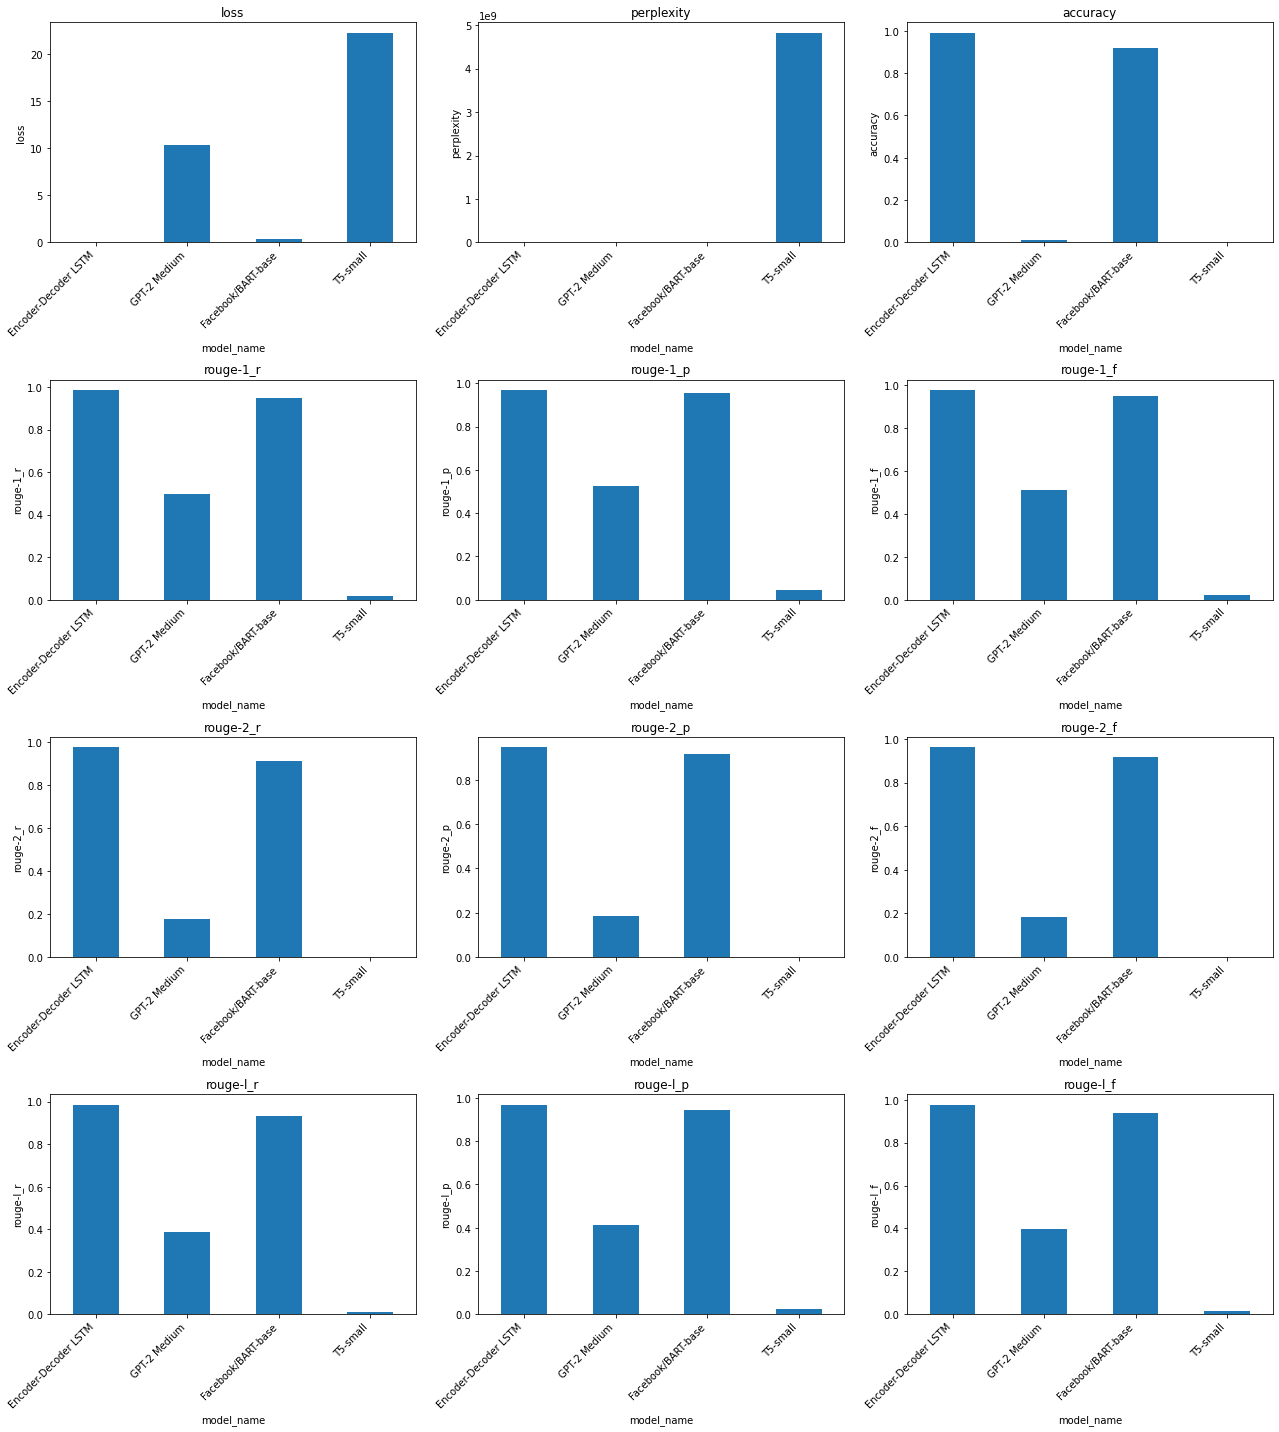

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(18, 20)) # grid of subplots 3 columns and 4 rows

metrics = ['loss', 'perplexity', 'accuracy', # list of metrics to plot
           'rouge-1_r', 'rouge-1_p', 'rouge-1_f', 
           'rouge-2_r', 'rouge-2_p', 'rouge-2_f', 
           'rouge-l_r', 'rouge-l_p', 'rouge-l_f']

for i, ax in enumerate(axs.ravel()): # loop to plot metrics for all models
    metric = metrics[i]
    eval_metrics_results_dataframe.plot(x='model_name', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xticklabels(eval_metrics_results_dataframe['model_name'], rotation=45, ha='right')

fig.tight_layout() # for better spacing between plots
plt.show() # show the plots

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 25px; font-weight:bold"><u>Discussion</u></p>

<p style="font-size: 20px">
The project shows the implementation of four different models in the context of a medical chatbot application: Encoder-Decoder LSTM, GPT-2 Medium, Facebook/BART-base, and T5-small. The dataset used to create this chatbot included a size of 295 MB and consists 0.26 million doctor-patient conversations. However, because to computational and temporal limitations, only a portion of the data was utilised.
</p>
<p style="font-size: 20px">
In particular, the Encoder-Decoder LSTM, a type of LSTM model, demonstrated remarkable performance across all metrics, although it was just trained on 6 epochs. Its low loss <b>(0.07)</b> and high accuracy <b>(0.990)</b>, along with good ROUGE scores, point to its potential as a robust model for this application. However, this model required pre-trianed word embedding like word2vec for better text generation.  Similarly, Facebook/BART-base showed better loss <b>(0.39)</b> and accuracy <b>(0.92)</b>, especially when comparing its metrics to the other pre-trained models.
</p>
<p style="font-size: 20px">
The GPT-2 Medium and T5-small versions, on the other hand, failed. Despite their success in a variety of NLP tasks, they failed in this particular application and under the current training conditions (limited to only two epochs). This implies that these models might require further training or modifications suited to the medical field.
</p>
<p style="font-size: 20px">
Developing a medical chatbot, considering the limitations of using just a single NVIDIA GeForce RTX 3090 GPU, presents certain challenges. To transform this prototype into a fully functional project, several steps need to be undertaken. Firstly, the training durations should be extended to ensure the model learns optimally. Additionally, incorporating more diverse datasets, not limited to just doctor-patient dialogues, can provide a broader understanding and better performance. Moreover, it might be beneficial to explore other pre-trained models, especially those that aren't open-source, to potentially enhance the chatbot's capabilities. Lastly, fine-tuning of hyperparameters is essential to maximize the efficiency and effectiveness of the model. 
</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 25px; font-weight:bold"><u>Proof to time and computational Resources</u></p>

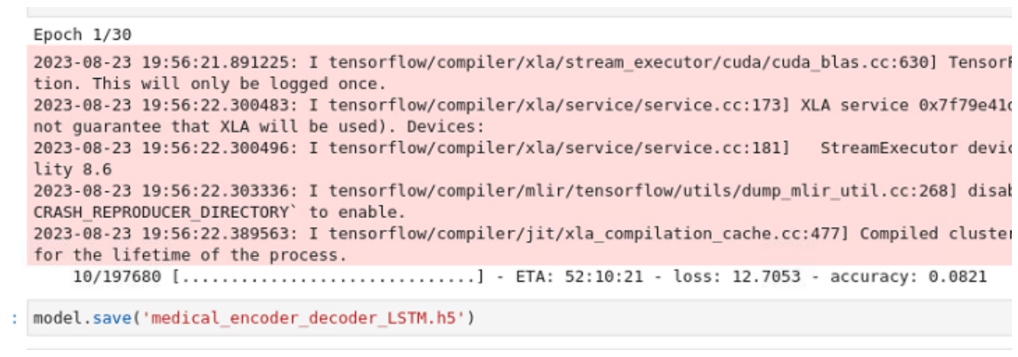

In [5]:
img = mpimg.imread('screenshots/LSTM_ETA_With_full_dataset_in _first_epoch.png') # function used to read the image from the screenshots directory
plt.figure(figsize=(18,12))  # size of the image
plt.imshow(img) # matplotlib imshow() method to show the image
plt.axis('off')  # Hide axes
plt.show()

<p style="font-size: 20px">From the above, time taken to execute just 1 epoch for simple encoder-decoder lstm can be seen, which is 52 hours.</p>

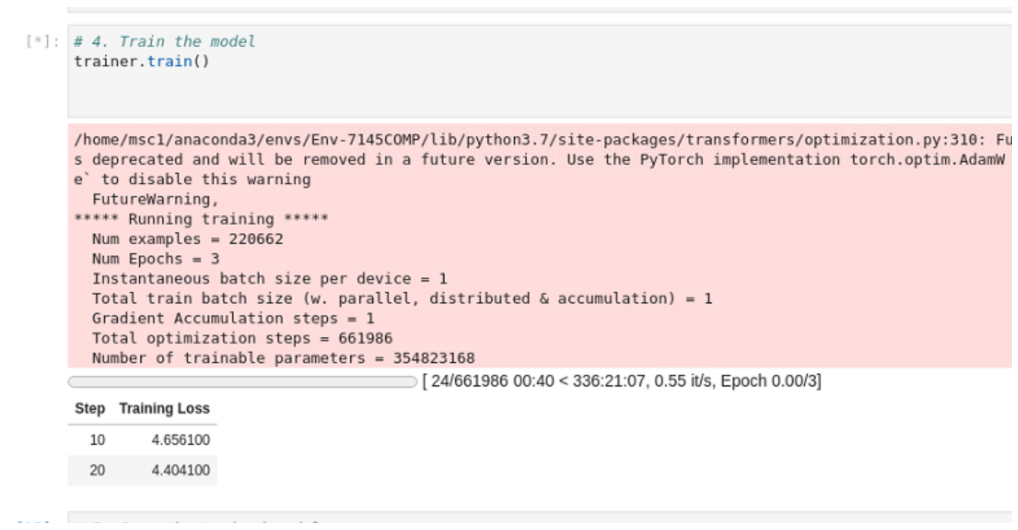

In [6]:
img = mpimg.imread('screenshots/gpt_2_with_half_dataset.png') # function used to read the image from the screenshots directory
plt.figure(figsize=(18,12))  # size of the image
plt.imshow(img) # matplotlib imshow() method to show the image
plt.axis('off')  # Hide axes
plt.show()

<p style="font-size: 20px">When I tried to train with tha half of the dataset, training time went to 336 hours.</p>

<p style="font-size: 20px">From the above screenshots, it is understandable to make a best model this dissertation time is not enough.</p>

<p style="font-size: 22px; font-weight:bold">Graph Execution error or memory out</p>

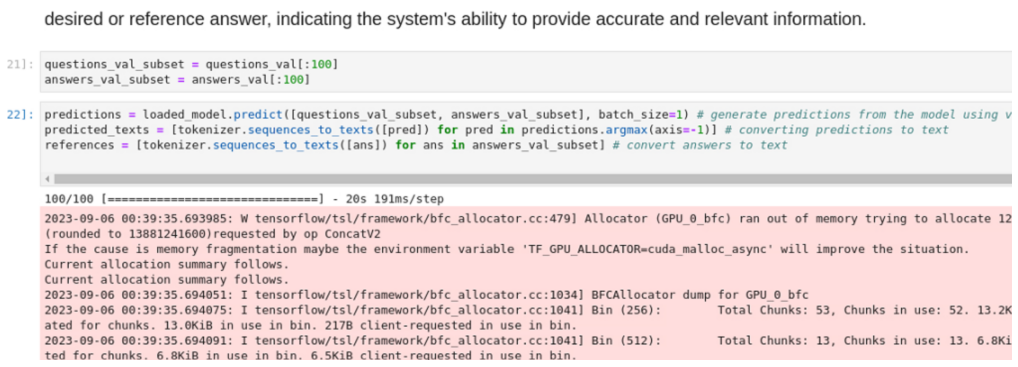

In [7]:
img = mpimg.imread('screenshots/graph_execution_error_even_with_subset_of_validation_dataset.png') # function used to read the image from the screenshots directory
plt.figure(figsize=(18,12))  # size of the image
plt.imshow(img) # matplotlib imshow() method to show the image
plt.axis('off')  # Hide axes
plt.show()

<p style="font-size: 20px">
I couldn't compute the evaluation metrics for the entire validation dataset, even though it wasn't that large, because of the memory issue. This might mean that I didn't pick the best data batches for analysis. Even while training i was facing these issue than apt smaller configurations as possible. </p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 25px; font-weight:bold">I have used BART model for the model serving using docker containerized flask application with mobile application (developed with React Native).</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p  style="font-size:30px; text-align:center; font-weight:bold">Thank you!</p>

<div style="width:100%;height:1px; background-color:black"></div>